In [1]:
# import modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# functions

In [3]:
# load data
data = pd.read_csv('global_cancer_patients_2015_2024.csv')
print(f'Data:\n {data}')

Data:
       Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  \
0      PT0000000   71    Male             UK  2021           6.4   
1      PT0000001   34    Male          China  2021           1.3   
2      PT0000002   80    Male       Pakistan  2023           7.4   
3      PT0000003   40    Male             UK  2015           1.7   
4      PT0000004   43  Female         Brazil  2017           5.1   
...          ...  ...     ...            ...   ...           ...   
49995  PT0049995   80    Male       Pakistan  2023           2.3   
49996  PT0049996   40  Female            USA  2018           6.4   
49997  PT0049997   74    Male       Pakistan  2015           6.2   
49998  PT0049998   21    Male         Brazil  2018           4.0   
49999  PT0049999   22    Male       Pakistan  2023           5.1   

       Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
0                2.8          9.5      0.9            8.7        Lung   
1                4.5          

In [4]:
# data summary
print(f'Data shape: {data.shape}')
print(f'Data summary:\n {data.describe()}')

factors = {
    'Gender': pd.unique(data['Gender']),
    'Country_Region': pd.unique(data['Country_Region']),
    'Year': pd.unique(data['Year']),
    'Cancer_Type': pd.unique(data['Cancer_Type']),
    'Cancer_Stage': pd.unique(data['Cancer_Stage'])
}
print(f"Factors:\n{pd.DataFrame(dict([(k, pd.Series(v)) for k, v in factors.items()])).fillna('').to_string(index=False)}")

print(f'NAs:\n {data.isna().sum()}')
print(f'Duplicates:\n {data.duplicated().sum()}')

Data shape: (50000, 15)
Data summary:
                 Age          Year  Genetic_Risk  Air_Pollution   Alcohol_Use  \
count  50000.000000  50000.000000  50000.000000   50000.000000  50000.000000   
mean      54.421540   2019.480520      5.001698       5.010126      5.010880   
std       20.224451      2.871485      2.885773       2.888399      2.888769   
min       20.000000   2015.000000      0.000000       0.000000      0.000000   
25%       37.000000   2017.000000      2.500000       2.500000      2.500000   
50%       54.000000   2019.000000      5.000000       5.000000      5.000000   
75%       72.000000   2022.000000      7.500000       7.500000      7.500000   
max       89.000000   2024.000000     10.000000      10.000000     10.000000   

            Smoking  Obesity_Level  Treatment_Cost_USD  Survival_Years  \
count  50000.000000   50000.000000        50000.000000    50000.000000   
mean       4.989826       4.991176        52467.298239        5.006462   
std        2.88157

In [5]:
# transfer strings to factors
data['Gender_factor'] = pd.Categorical(data['Gender']).codes
data['Country_Region_factor'] = pd.Categorical(data['Country_Region']).codes
data['Year_factor'] = pd.Categorical(data['Year']).codes
data['Cancer_Type_factor'] = pd.Categorical(data['Cancer_Type']).codes
data['Cancer_Stage_factor'] = pd.Categorical(data['Cancer_Stage']).codes

# save to df
df = data.copy()
df = df.drop(columns=['Patient_ID', 'Gender', 'Country_Region', 'Year', 'Cancer_Type', 'Cancer_Stage'])
df = df.rename(columns={
    'Gender_factor': 'Gender',
    'Country_Region_factor': 'Country_Region',
    'Year_factor': 'Year',
    'Cancer_Type_factor': 'Cancer_Type',
    'Cancer_Stage_factor': 'Cancer_Stage'
})

# show df
print(f'DataFrame sorted:\n {df}')

DataFrame sorted:
        Age  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  Obesity_Level  \
0       71           6.4            2.8          9.5      0.9            8.7   
1       34           1.3            4.5          3.7      3.9            6.3   
2       80           7.4            7.9          2.4      4.7            0.1   
3       40           1.7            2.9          4.8      3.5            2.7   
4       43           5.1            2.8          2.3      6.7            0.5   
...    ...           ...            ...          ...      ...            ...   
49995   80           2.3            7.5          2.8      3.8            2.9   
49996   40           6.4            3.5          2.9      9.0            9.8   
49997   74           6.2            1.6          8.7      4.7            4.0   
49998   21           4.0            6.5          7.6      8.6            8.1   
49999   22           5.1            9.8          3.2      0.0            0.7   

       Treatment_Cos

In [6]:
# correlation matrix by plotly
cor_matrix = df.corr()
cor_matrix_rounded = cor_matrix.round(1)

fig = px.imshow(cor_matrix_rounded, 
                title="Correlation Matrix",
                color_continuous_scale='RdBu_r',
                text_auto=True)

fig.update_traces(
    hovertemplate='Variables: %{x}<br>Variables: %{y}<br>Correlation: %{customdata}', 
    customdata=cor_matrix.values
)

fig.update_layout(
    width=800,
    height=800, 
    xaxis=dict(tickmode='array', tickvals=list(range(len(cor_matrix.columns))), ticktext=cor_matrix.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(cor_matrix.index))), ticktext=cor_matrix.index),
)

fig.show()

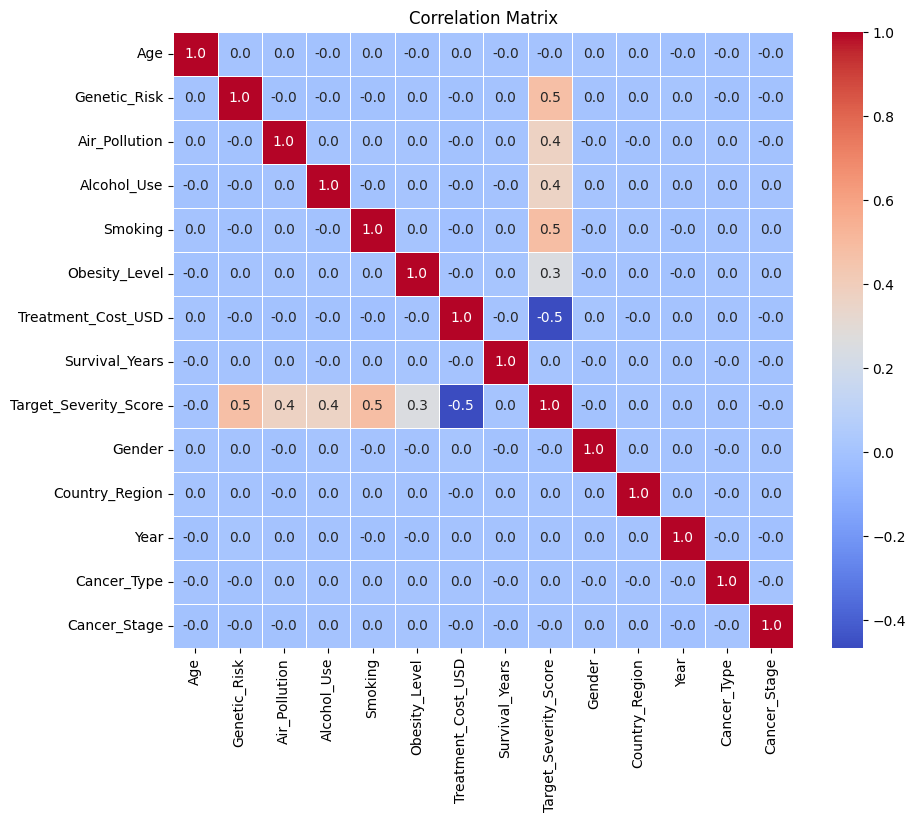

In [7]:
# correlation matrix by seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.1f')
plt.title('Correlation Matrix')
plt.show()
